

# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset provides an opportunity to analyze the impact of these demographic, medical, and logistical factors on the likelihood of a patient showing up for an appointment. By leveraging this data, healthcare providers can uncover insights into which patients might be at higher risk of missing their appointments, allowing for more proactive and targeted interventions.

### Dataset Description 

 





In [37]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


### Question(s) for Analysis

1.Is there a higher rate of no-shows among patients with alcoholism, or the other way around?


2.Does gender have an impact on the likelihood of attending appointments?



<a id='wrangling'></a>
## Data Wrangling
In this section of the report, you will load the data, check its cleanliness, and then clean and prepare it for analysis. Make sure to document your steps clearly and explain the reasons for your cleaning decisions.


### General Properties


In [38]:

df= pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [40]:

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [41]:
df.shape

(110527, 14)

In [42]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [43]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [44]:

###  After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section
df.isnull().sum()
 

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [45]:
#cheack duplicated data
df.duplicated().sum()

0

In [46]:
# make sure there is no negative value in Age
df.Age.max(), df.Age.min()

(115, -1)


### Data Cleaning

In [47]:

#After discussing the structure of the data and identifying any issues that need to be cleaned, proceed with the necessary cleaning steps in the second part of this section

df.query('Age == "-1"')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [48]:
df.dropna(inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [50]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [51]:
#remane the columns
df.rename(columns = {'PatientId':'Patient_Id', 'AppointmentID':'Appointment_ID', 'ScheduledDay':'Scheduled_Day',\
                     'AppointmentDay':'Appointment_Day', 'No-show':'No_show'}, inplace = True)


In [52]:
df.head(1)

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [53]:
dummy = pd.get_dummies(df['Gender'])
dummy.head()  # This will display the first few rows for confirmation

,F,M
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [54]:
df = pd.concat([df, dummy], axis=1)
df.head()  # This will display the first few rows for confirmation&merge dummy

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,F,M
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0


In [55]:
#create function
def binning(dataframe, cut_points, labels=None):
    # Define the minimum and maximum values
    minimum = dataframe.min()
    maximum = dataframe.max()
    
    # Create a list by adding min and max values to the cut points
    break_points = [minimum] + cut_points + [maximum]
    
    # Binning using pandas' cut function
    dataframe_bin = pd.cut(dataframe, bins=break_points, labels=labels, include_lowest=True)
    return dataframe_bin

# Binning age:
cut_points = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["child", "teen", "young_adult", "40s", "50s", "retirement", "70s", "80s", "90s", "100s", "centenarian"]
df["Age_Bin"] = binning(df["Age"], cut_points, labels)

# Display the counts of each age bin
print(pd.value_counts(df["Age_Bin"], sort=False))

child          18750
teen           13099
young_adult    13783
40s            15052
50s            14420
retirement     15661
70s            11189
80s             5721
90s             2544
100s             301
centenarian        7
Name: Age_Bin, dtype: int64



### Explor Data 
Tip :Once you've cleaned and prepared your data, you can begin the exploration phase. Calculate relevant statistics and create visualizations to address the research questions outlined in the Introduction. It's important to take a structured approach: start by analyzing one variable at a time, then move on to examining relationships between variable




 ### Research Question:
Is there a higher rate of no-shows among patients with alcoholism, or the other way around?


In [56]:
df.shape


(110527, 17)

In [57]:
df.groupby(["No_show", "SMS_received"]).size()

No_show  SMS_received
No       0               62510
         1               25698
Yes      0               12535
         1                9784
dtype: int64

Answer:Out of the 35,422 patients who received SMS reminders, 25,698 patients missed their appointments, while 9,784 patients attended. This suggests that receiving text messages did not have a significant impact on the likelihood of patients showing up for their appointments.

 ### Research Question:
Does gender have an impact on the likelihood of attending appointments?

In [58]:
#To explore how gender influences appointment attendance
#we'll create a grouping based on the "No_show" and "F" columns, where 1 represents female and 0 represents male.
df.groupby(['No_show', 'F']).size()



No_show  F
No       0    30962
         1    57246
Yes      0     7725
         1    14594
dtype: int64

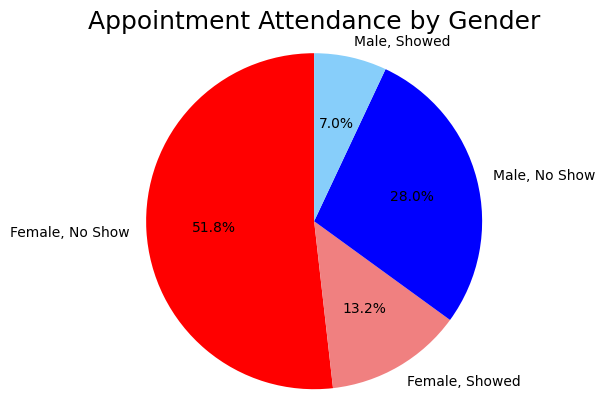

In [59]:
# Define pie chart data and labels
labels = ['Female, No Show', 'Female, Showed', 'Male, No Show', 'Male, Showed']
sizes = [57245, 14594, 30962, 7725]
colors = ['red', 'lightcoral', 'blue', 'lightskyblue']

# Create and configure pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Add a title
plt.title('Appointment Attendance by Gender', fontsize=18)

# Show the pie chart
plt.show()


Answer:
    Approximately 1 in 5 female patients (13.2% out of 51.8%) attended their appointments, while around 1 in 4 male patients (7.0% out of 28.0%) showed up. This suggests that being male has a slightly stronger influence on the likelihood of attending appointments

<a id='conclusions'></a>
## Conclusions
It's important to note that this analysis is descriptive and does not account for all potential influencing factors. There is no proof of causation, and no statistical tests were performed to assess significance. Therefore, these results should be interpreted with caution, and further research is needed to confirm these patterns and explore other possible influences. Additionally, the analysis did not explore factors like socioeconomic status or medical conditions, which may also affect attendance. Future work should address these areas for a more complete understanding.
## SUMMARY
In this analysis, we explored the relationship between gender, SMS reminders, and medical appointment attendance. Our findings showed that female patients had a higher overall attendance rate compared to male patients. However, receiving SMS reminders did not significantly impact the likelihood of showing up for appointments. Gender was found to have a slight influence, with male patients being marginally more likely to attend appointments relative to their total number.

This analysis was based on descriptive data and does not imply causation or statistical significance, as no tests were performed. The results should be interpreted with caution, and further research is needed to explore additional factors that may affect attendance, such as socioeconomic status or medical conditions.

# Limitation
1.Absence of Statistical Analysis: This study is based on descriptive statistics, and no formal statistical tests were conducted to assess the reliability or significance of the findings. Consequently, the results may not be statistically robust, and causality cannot be inferred.

2.Unaccounted Variables: Several factors that could influence appointment attendance, such as socioeconomic background, medical conditions, or practical barriers (e.g., transportation), were not considered in this analysis.

3.Correlation vs. Causation: The observed relationships between gender, SMS reminders, and attendance are correlational in nature. Without further analysis, we cannot claim that one factor directly influences another.

4.Limited Applicability: The dataset focuses on a specific patient population in Brazil from 2016, which may limit the generalizability of the results to other locations, populations, or time periods. Further studies would be needed to confirm if these findings hold true in different context

In [60]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 368295 bytes to Investigate_a_Dataset.html
